<font size="+2"><b>Rental Property Exploratory Data Analysis (Capstone 1)</b></font>

The purpose of this project is to identify relative attractiveness of rental properties in various neighborhoods throughout the United States and compare expected return on investment over time. This EDA exercise will begin to focus my attention on how to best approach this analysis, beginning with some initial questions.

<font size="+1"><b>Initial Questions</b></font>

1) How many neighborhoods do I have data for within each state and city? <br>
2) Within these neighborhoods, how is the Price to Rent Ratio distributed? <br>
3) Looking further into the ratio, how is median value and rental value (per sq ft.) distributed and are there any outliers? <br>
4) Lastly, how has the Price to Rent Ratio trended over time? <br>


In [4]:
#Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from collections import Counter

In [5]:
#Load Rental Data - Note there are some missing values in some columns, but I've filtered out as many as 
#I'm willing to drop from this dataset in lieu of losing other important data points
rental_data = pd.read_csv('C:/datascience/springboard/projects/Rental Property ROI/data/Rental Data Update.csv', parse_dates=['date'], infer_datetime_format=True)
rental_data.info()
rental_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426855 entries, 0 to 426854
Data columns (total 32 columns):
RegionID                                        426855 non-null int64
RegionName                                      426855 non-null object
City                                            426855 non-null object
State                                           426855 non-null object
Metro                                           426763 non-null object
CountyName                                      426855 non-null object
SizeRank                                        426855 non-null float64
date                                            426855 non-null datetime64[ns]
Neighborhood_MedianValuePerSqft_AllHomes        426855 non-null float64
Neighborhood_PriceToRentRatio_AllHomes          421633 non-null float64
Neighborhood_Zhvi_3bedroom                      340697 non-null float64
Neighborhood_Zhvi_4bedroom                      257194 non-null float64
Neighborhood_Zhvi_SingleF

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,date,Neighborhood_MedianValuePerSqft_AllHomes,Neighborhood_PriceToRentRatio_AllHomes,...,county_fip,hi_lo_ratio,highest_tract,lowest_tract,monthly_insurance,annual_insurance,state_avg_medval,size_adj_pct,time_adj_pct,adj_mo_ins
0,4083,Chestnut Ridge,Ramapo,NY,New York_Newark_Jersey City,Rockland County,1761.0,2011-10-31,212.0,11.68,...,36087,3.274615,30.682099,9.369681,105,1256,464647.62,0.769831,0.674142,-54.492435
1,6158,New Hempstead,Ramapo,NY,New York_Newark_Jersey City,Rockland County,2492.0,2011-10-31,217.0,10.37,...,36087,3.274615,30.682099,9.369681,105,1256,464647.62,0.835687,0.731951,-64.226608
2,6263,Nyack,Orangetown,NY,New York_Newark_Jersey City,Rockland County,2200.0,2011-10-31,236.0,14.53,...,36087,3.274615,30.682099,9.369681,105,1256,464647.62,0.778009,0.808544,-66.050713
3,6498,Piermont,Orangetown,NY,New York_Newark_Jersey City,Rockland County,5000.0,2011-10-31,332.0,16.11,...,36087,3.274615,30.682099,9.369681,105,1256,464647.62,1.483059,0.960418,-149.557480
4,7663,Valley Cottage,Clarkstown,NY,New York_Newark_Jersey City,Rockland County,1172.0,2011-10-31,228.0,13.47,...,36087,3.274615,30.682099,9.369681,105,1256,464647.62,0.848385,0.902266,-80.374229


In [6]:
#Count most recent number of neighborhoods per State
max_date = rental_data['date'].max()
latest_month_data = rental_data[rental_data['date'] == max_date] #filter data to view all neighborhoods on most recent month

region_count = Counter()

for region in latest_month_data['State']:
    region_count[region] += 1
   
print(region_count)

Counter({'CA': 824, 'TX': 437, 'FL': 326, 'NY': 255, 'WA': 243, 'AZ': 213, 'OH': 166, 'CO': 157, 'OR': 151, 'NC': 148, 'VA': 134, 'PA': 122, 'IL': 111, 'NM': 109, 'WI': 109, 'MO': 90, 'IN': 89, 'MN': 77, 'TN': 75, 'KY': 72, 'AL': 64, 'DC': 61, 'MA': 56, 'KS': 56, 'NJ': 54, 'NV': 54, 'GA': 41, 'MD': 41, 'OK': 40, 'LA': 37, 'IA': 32, 'AK': 29, 'ID': 25, 'CT': 24, 'MI': 23, 'MT': 22, 'NE': 21, 'RI': 20, 'UT': 18, 'AR': 16, 'HI': 16, 'SC': 12, 'ME': 12, 'MS': 7, 'NH': 2})


C:\Users\KKanoe\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\KKanoe\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


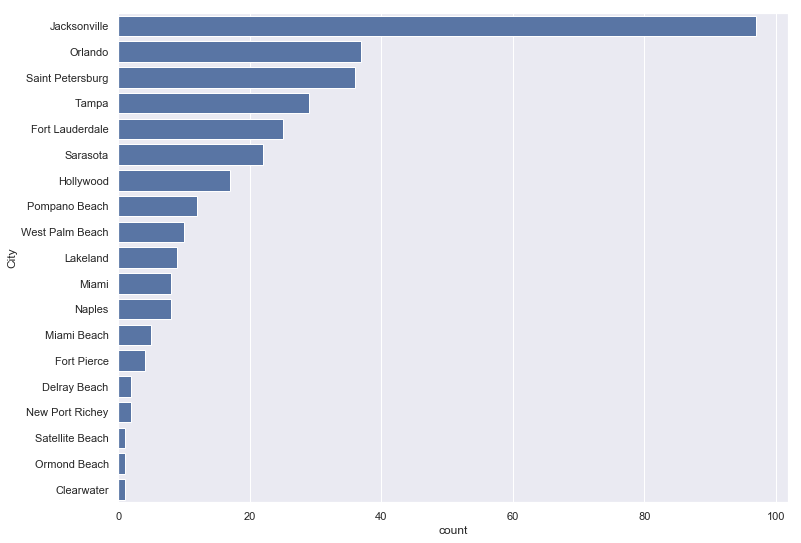

In [7]:
#Look closer at the number of neighborhoods amongst each state's cities
filter_state = 'FL' #Change state code to view region count within each city for a given state

neigh_sub = latest_month_data.loc[latest_month_data['State'] == filter_state, :]
neigh_sub.loc[:, 'count'] = neigh_sub.groupby('City')['RegionID'].transform('count')
neigh_sub = neigh_sub.sort_values('count', ascending=False)

fig, ax = plt.subplots(figsize=(12,9))
ax = sns.barplot(x='count', y='City', data=neigh_sub, label='City Count', color='b')

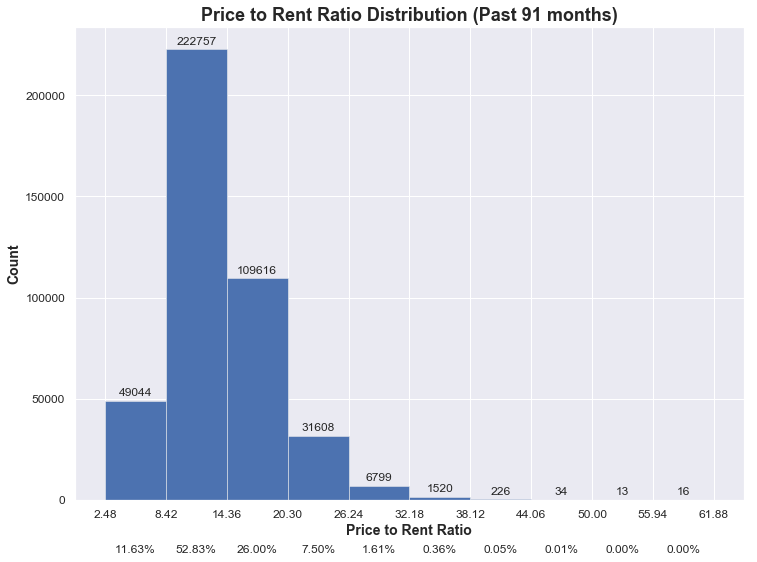

In [8]:
#Examine the distribution of price to rent ratio. This should give us a good idea of how to think about relative price to 
#rent ratio's and how to strategize amongst different markets. The Price Rent Ratio represents the median of all home values whose
#value was divided by 12 times its estimated monthly rent price.
melt_data = pd.melt(rental_data, id_vars='date', value_vars='Neighborhood_PriceToRentRatio_AllHomes').dropna(subset=['value'])

fig, ax = plt.subplots(figsize = (12,9))
plt.style.use('ggplot')
counts, bins, patches = ax.hist(melt_data['value'])
ax.set_xticks(bins)
ax.tick_params(axis='x', direction='out', labelsize=12)
ax.tick_params(axis='y', direction='out', labelsize=12)
ax.set_title('Price to Rent Ratio Distribution (Past 91 months)', fontsize=18, weight='bold')
ax.set_xlabel('Price to Rent Ratio', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')

bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for patch, count, x in zip(patches, counts, bin_centers):
    #Get x and y placement of label
    y_value = patch.get_height()
    x_value = patch.get_x() + patch.get_width() / 2
    
    #Number of points between bar and label
    space = 3
    
    #Vertical alignment of positive values
    va = 'bottom'
    
    #If value of bar is negative: place label below
    if y_value < 0:
        space *= -1
        va = 'top'
    
    #Use y-value as label and format number with zero decimal place
    label = "{:.0f}".format(y_value)
    
    #Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords='offset points', ha='center', va=va, size=12)
    
    #Label the issuer percentages 
    percent = '%00.2f%%' % (100* float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'), xytext=(0, -45), textcoords='offset points', 
                va='top', ha='center', size=12)

plt.subplots_adjust(bottom=0.15)

Text(0,0.5,'')

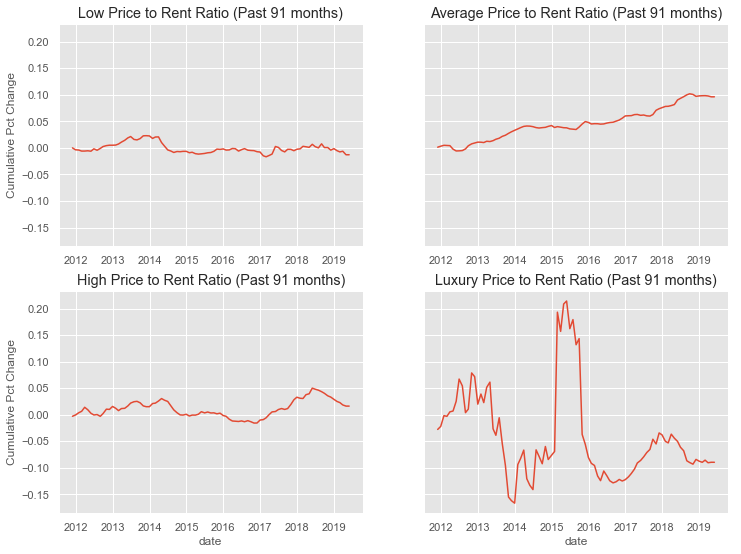

In [9]:
#Separate ratio's into groups to examine trends
bins = [0, 8.42, 20.3, 32.18, np.inf] #Smaller Bins!
names = ['low','average','high','luxury']

rental_data.loc[:, 'ratio_range'] = pd.cut(rental_data['Neighborhood_PriceToRentRatio_AllHomes'], bins, labels=names)

#Explore average of ratios in time-series to identify broad trends
ratios_mean = rental_data.groupby(['date','ratio_range'], as_index=False)['Neighborhood_PriceToRentRatio_AllHomes'].mean() 
ratios_mean = ratios_mean.sort_values(['ratio_range','date'])
ratios_mean.loc[:, 'ratio_pct_chg'] = ratios_mean.groupby('ratio_range')['Neighborhood_PriceToRentRatio_AllHomes'].transform(lambda x: x.pct_change())
ratios_mean.loc[:, 'ratio_pct_chg_cum'] = ratios_mean.groupby('ratio_range')['ratio_pct_chg'].transform('cumsum')

#Subset by group into separate dataframes
ratios_low = ratios_mean[ratios_mean['ratio_range'] == 'low']
ratios_avg = ratios_mean[ratios_mean['ratio_range'] == 'average']
ratios_high = ratios_mean[ratios_mean['ratio_range'] == 'high']
ratios_lux = ratios_mean[ratios_mean['ratio_range'] == 'luxury']

#Plot each group
x = 'date'
y = 'ratio_pct_chg_cum'

#FIX Y SCALE TO BE THE SAME AND GIVE SAMPLE SIZE. SHOULD I BIN DIFFERENT?

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,9), sharey=True)
sns.lineplot(x=x, y=y, data=ratios_low, ax=ax1)
ax1.set_title('Low Price to Rent Ratio (Past 91 months)')
ax1.set_xlabel('')
ax1.set_ylabel('Cumulative Pct Change')

sns.lineplot(x=x, y=y, data=ratios_avg, ax=ax2)
ax2.set_title('Average Price to Rent Ratio (Past 91 months)')
ax2.set_xlabel('')
ax2.set_ylabel('')

sns.lineplot(x=x, y=y, data=ratios_high, ax=ax3)
ax3.set_title('High Price to Rent Ratio (Past 91 months)')
ax3.set_ylabel('Cumulative Pct Change')

sns.lineplot(x=x, y=y, data=ratios_lux, ax=ax4)
ax4.set_title('Luxury Price to Rent Ratio (Past 91 months)')
ax4.set_ylabel('')

In [10]:
#Subset each ratio group and count where most groups are located
rental_sub = rental_data[rental_data['ratio_range'] == 'low']

subset_count = Counter()

for region in rental_sub['State']:
    subset_count[region] += 1
   
print(subset_count)

Counter({'TX': 11340, 'OH': 5606, 'FL': 4915, 'IN': 3080, 'MO': 2255, 'WI': 2227, 'NY': 2191, 'KS': 1679, 'PA': 1642, 'NC': 1258, 'AL': 1046, 'IA': 1006, 'CA': 851, 'IL': 851, 'KY': 825, 'MN': 796, 'MI': 776, 'CT': 740, 'OK': 722, 'AZ': 658, 'TN': 651, 'MD': 638, 'RI': 581, 'MA': 493, 'NJ': 493, 'NV': 457, 'CO': 321, 'NE': 255, 'SC': 252, 'AR': 234, 'LA': 202, 'VA': 117, 'MS': 53, 'NM': 53, 'GA': 31, 'DC': 19, 'NH': 12, 'WA': 6})


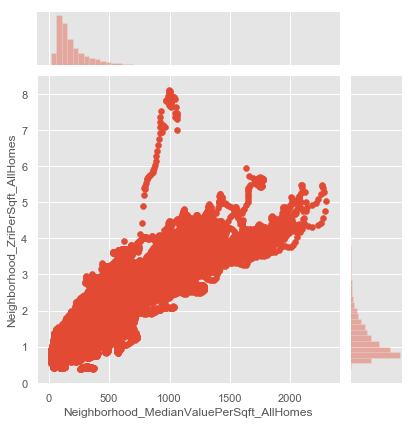

In [11]:
#Now that we viewed the ratio distribution. Let's make a joint plot of all home value to rental price per 
#sq ft. to look at the components more closely 

sns.jointplot(x='Neighborhood_MedianValuePerSqft_AllHomes', y='Neighborhood_ZriPerSqft_AllHomes', data=rental_data)

Text(0.5,1,'A closer look at the obvious outliers')

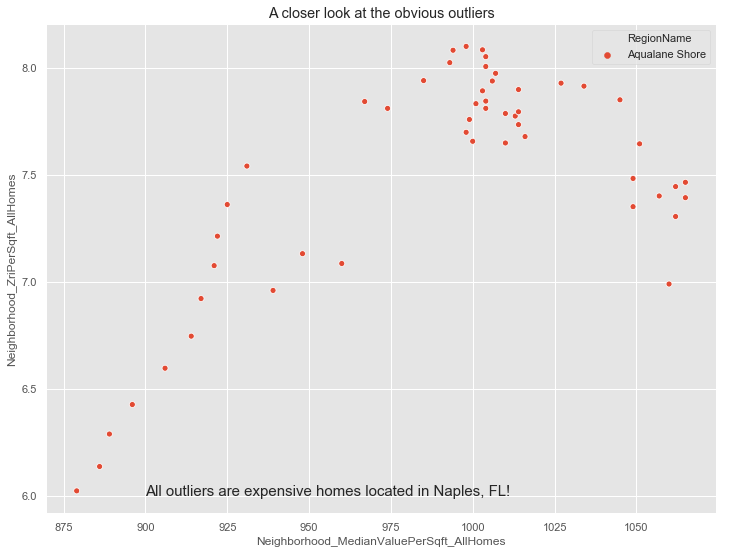

In [17]:
#Examine obvious outliers from previous graph to gain insights
outlier_group = rental_data[(rental_data['Neighborhood_ZriPerSqft_AllHomes'] >= 6) & (rental_data['Neighborhood_MedianValuePerSqft_AllHomes'] <= 1100)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,9))
ax = sns.scatterplot(x='Neighborhood_MedianValuePerSqft_AllHomes', y='Neighborhood_ZriPerSqft_AllHomes', hue='RegionName', data=outlier_group)
ax.text(900, 6, "All outliers are expensive homes located in Naples, FL!", size=15)
ax.set_title('A closer look at the obvious outliers')

<font size="+1"><b> Conclusion and Remaining Questions</b></font>

This EDA process has allowed me to better understand the dataset, but has lead to a series of questions which will need to be answered to better understand where this analysis could lead.

Additional Questions:

1) When looking at separate groups, why has the "low" group been so stable relative to the other groups? In particular relative to the "average" group, which has seen its price to rent ratio steadily increase. <br>
2) One variable yet to be introduced is relative costs. How much will property taxes affect this analysis? <br>
3) The dataset exhibits a positive skew where high dollar homes are distant from the typical property. Should I narrow my analysis to eliminate these properties since they're not my focus group?

My next steps will focus on integrating costs and narrowing my analysis to produce a single metric, which will allow me to dynamically compare rental properties across regions and begin to develop a machine learning model, which predicts which rental markets across the United States will produce superior returns for capital invested.